# FAST tests / examples

This notebook contains tests that should be run in addition to the unit tests (run `pytest -v tests/tests_pytest.py`) in the root FAST directory. The plotted results should be analysed to check the expected output is produced.

In [1]:
import fast
import numpy
import matplotlib
from matplotlib import pyplot
from astropy.io import fits
from aotools import zernike
import aotools

matplotlib.rcParams['figure.figsize'] = 8,5
matplotlib.rcParams['font.size'] = 12

## Basic simulation parameters

In [2]:
sim = fast.Fast("test_params.py")

fast.fast.init_atmos [INFO]  Initialising atmosphere
fast.fast.init_beam_params [INFO]  Initialising beam parameters
fast.fast.init_frequency_grid [INFO]  Initialising spatial frequencies
fast.fast.init_frequency_grid [INFO]  Auto set NPXLS to 164
fast.fast.init_ao_params [INFO]  Initialising AO parameters
fast.fast.init_pupil_mask [INFO]  Initialising pupil mask
fast.fast.init_phs_logamp [INFO]  Initialising phase and log-amplitude arrays
fast.fast.compute_link_budget [INFO]  Computing analytical link budget
fast.fast.compute_powerspec [INFO]  Computing (residual) phase power spectra
fast.fast.compute_powerspec [INFO]  Computing (residual) phase power spectra
fast.fast.compute_powerspec [INFO]  Computing temporal power spectra


List all of the simulation parameters. Some are provided in the params file (`test_params.py`), others are calculated on simulation initialisation.

In [3]:
for item,value in sim.params.items():
    print(item,": ", value)

NPXLS :  auto
DX :  0.01
NITER :  100
SUBHARM :  False
FFTW :  False
FFTW_THREADS :  1
NCHUNKS :  10
TEMPORAL :  True
DT :  0.001
LOGFILE :  None
LOGLEVEL :  INFO
SEED :  None
WVL :  1.55e-06
POWER :  1
W0 :  opt
D_GROUND :  0.8
OBSC_GROUND :  0
D_SAT :  0.1
OBSC_SAT :  0
AXICON :  False
SMF :  True
H_SAT :  36000000.0
L_SAT :  None
H_TURB :  [  822.86353111 10953.4295728  17047.65670972 24110.48991942]
CN2_TURB :  [2.12887727e-12 9.96980769e-14 1.51224428e-14 3.43356519e-16]
WIND_SPD :  [ 9.43768796 32.64195857 11.58980775  8.00588285]
WIND_DIR :  [0, 90, 180, 270]
L0 :  inf
l0 :  1e-06
ZENITH_ANGLE :  55
PROP_DIR :  up
DTHETA :  [4, 0]
TRANSMISSION :  1
AO_MODE :  AO
DSUBAP :  0.1
TLOOP :  0.001
TEXP :  0.001
ALIAS :  True
NOISE :  0
MODAL :  False
MODAL_MULT :  1
ZMAX :  None
COHERENT :  False
MODULATION :  None
EsN0 :  None


The simulation also calculates a link budget, given the simulation parameters above. The link budget terms are in dBm (power), dBi (free space, transmitter gain, receiver gain) and dB (transmission_loss and smf_coupling). The expected output power is obtained by summing the terms in the link budget. This is stored (in Watts) as the attribute `sim.diffraction_limit` since this represents the received power without any atmosphere.

In [4]:
for item,value in sim.link_budget.items():
    print(item,": ", value)

power :  30.0
free_space :  -289.86285755334484
transmitter_gain :  123.30339090372212
receiver_gain :  106.13636349047684
transmission_loss :  0.0
smf_coupling :  -0.9005635886935243


In [5]:
print(sim.diffraction_limit)

7.37281480598355e-07


Finally, the atmospheric parameters are also calculated and provided. Below we list the line of sight (los) parameters, which are most useful, but they are also computed at the standard wavelength of 500nm at zenith.

In [25]:
print("r0 (m): ", sim.r0_los)
print("theta0 (arcsec): ", sim.theta0_los)
print("tau0 (s): ", sim.tau0_los)

r0 (m):  0.13782064140780392
theta0 (arcsec):  2.2751110729033894
tau0 (s):  0.004345433911948871


It is easy to modify any simulation parameters. Usually I take a copy of the parameters dict and change values, the create a new simulation.

In [6]:
p_new = sim.params.copy()
p_new['NITER'] = 1000
sim_new = fast.Fast(p_new)

fast.fast.init_atmos [INFO]  Initialising atmosphere
fast.fast.init_beam_params [INFO]  Initialising beam parameters
fast.fast.init_frequency_grid [INFO]  Initialising spatial frequencies
fast.fast.init_frequency_grid [INFO]  Auto set NPXLS to 1632
fast.fast.init_ao_params [INFO]  Initialising AO parameters
fast.fast.init_pupil_mask [INFO]  Initialising pupil mask
fast.fast.init_phs_logamp [INFO]  Initialising phase and log-amplitude arrays
fast.fast.compute_link_budget [INFO]  Computing analytical link budget
fast.fast.compute_powerspec [INFO]  Computing (residual) phase power spectra
fast.fast.compute_powerspec [INFO]  Computing (residual) phase power spectra
fast.fast.compute_powerspec [INFO]  Computing temporal power spectra


## Simulation output

Now run the simulation and plot the output. The results are retreived in different units from the `sim.result` object, which can give various linear and logarithmic (dB) units.

In [7]:
sim_new.run()

100%|██████████| 10/10 [00:01<00:00,  8.35it/s]


Text(0, 0.5, 'Rx power (W)')

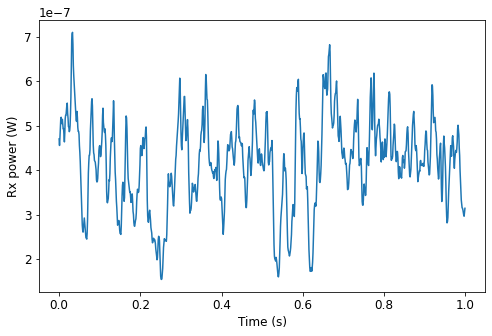

In [8]:
pyplot.plot(numpy.arange(sim_new.Niter) * sim_new.dt, sim_new.result.power)
pyplot.xlabel("Time (s)")
pyplot.ylabel("Rx power (W)")

Text(0.5, 0, 'Loss (dB)')

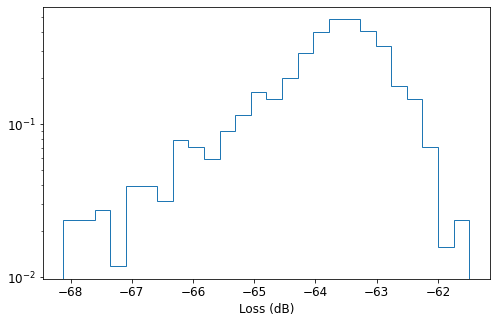

In [9]:
pyplot.figure()
pyplot.hist(sim_new.result.dB_abs, bins='auto', histtype='step', density=True)
pyplot.semilogy()
pyplot.xlabel("Loss (dB)")

### Temporal sequences vs. random sequences

One important test is to check that the temporal sequences (such as the above generated) give the same distribution as random sequences. Let's run a random sequence and compare

In [10]:
prand = sim_new.params.copy()
prand['TEMPORAL'] = False
sim_rand = fast.Fast(prand)
sim_rand.run()

fast.fast.init_atmos [INFO]  Initialising atmosphere
fast.fast.init_beam_params [INFO]  Initialising beam parameters
fast.fast.init_frequency_grid [INFO]  Initialising spatial frequencies
fast.fast.init_frequency_grid [INFO]  Auto set NPXLS to 164
fast.fast.init_ao_params [INFO]  Initialising AO parameters
fast.fast.init_pupil_mask [INFO]  Initialising pupil mask
fast.fast.init_phs_logamp [INFO]  Initialising phase and log-amplitude arrays
fast.fast.compute_link_budget [INFO]  Computing analytical link budget
fast.fast.compute_powerspec [INFO]  Computing (residual) phase power spectra
fast.fast.compute_powerspec [INFO]  Computing (residual) phase power spectra
100%|██████████| 10/10 [00:00<00:00, 10.66it/s]


Text(0.5, 0, 'Loss (dB)')

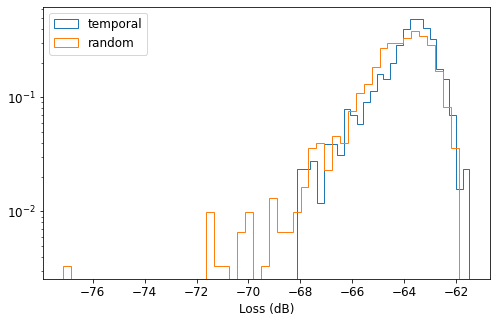

In [11]:
pyplot.figure()
pyplot.hist(sim_new.result.dB_abs, bins='auto', histtype='step', density=True, label='temporal')
pyplot.hist(sim_rand.result.dB_abs, bins='auto', histtype='step', density=True, label='random')
pyplot.legend(loc="upper left")
pyplot.semilogy()
pyplot.xlabel("Loss (dB)")

## Zernike decomposition

When there is no AO correction (`AO_MODE` is set to `"NOAO"`), the phase screens should have a Kolmogorov power spectrum and this should be reflected in the zernike decomposition. We start with our random simulation, turn AO off and run. We also set NCHUNKS to 1 so that we retain all 1000 phase screens.

In [12]:
p_noao = sim_rand.params.copy()
p_noao['AO_MODE'] = "NOAO"
p_noao['NCHUNKS'] = 1
sim_noao = fast.Fast(p_noao)
sim_noao.run()

fast.fast.init_atmos [INFO]  Initialising atmosphere
fast.fast.init_beam_params [INFO]  Initialising beam parameters
fast.fast.init_frequency_grid [INFO]  Initialising spatial frequencies
fast.fast.init_frequency_grid [INFO]  Auto set NPXLS to 164
fast.fast.init_ao_params [INFO]  Initialising AO parameters
fast.fast.init_pupil_mask [INFO]  Initialising pupil mask
fast.fast.init_phs_logamp [INFO]  Initialising phase and log-amplitude arrays
fast.fast.compute_link_budget [INFO]  Computing analytical link budget
fast.fast.compute_powerspec [INFO]  Computing (residual) phase power spectra
fast.fast.compute_powerspec [INFO]  Computing (residual) phase power spectra
100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


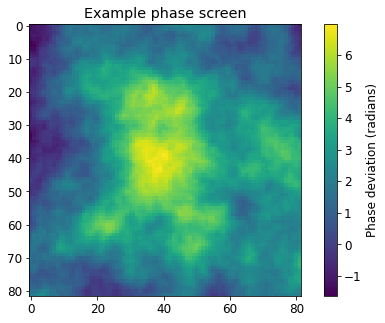

In [13]:
pyplot.imshow(sim_noao.phs[0])
pyplot.title("Example phase screen")
pyplot.colorbar(label="Phase deviation (radians)")

Now perform the zernike decomposition and compare to expected values

In [14]:
Z = zernike.zernikeArray(100, sim_noao.Npxls_pup-2)
Zcoeffs = numpy.array([(sim_noao.phs[:,1:-1,1:-1] * i).sum((1,2)) for i in Z]) / Z[0].sum()

In [15]:
noll = numpy.array([4.48626310e-01, 4.48626310e-01, 2.32048091e-02, 2.32048091e-02,
       2.32048091e-02, 6.18794933e-03, 6.18794933e-03, 6.18794933e-03,
       6.18794933e-03, 2.45254091e-03, 2.45254091e-03, 2.45254091e-03,
       2.45254091e-03, 2.45254091e-03, 1.18974317e-03, 1.18974317e-03,
       1.18974317e-03, 1.18974317e-03, 1.18974317e-03, 1.18974317e-03,
       6.54732925e-04, 6.54732925e-04, 6.54732925e-04, 6.54732925e-04,
       6.54732925e-04, 6.54732925e-04, 6.54732925e-04, 3.93156806e-04,
       3.93156806e-04, 3.93156806e-04, 3.93156806e-04, 3.93156806e-04,
       3.93156806e-04, 3.93156806e-04, 3.93156806e-04, 2.51771562e-04,
       2.51771562e-04, 2.51771562e-04, 2.51771562e-04, 2.51771562e-04,
       2.51771562e-04, 2.51771562e-04, 2.51771562e-04, 2.51771562e-04,
       1.69423744e-04, 1.69423744e-04, 1.69423744e-04, 1.69423744e-04,
       1.69423744e-04, 1.69423744e-04, 1.69423744e-04, 1.69423744e-04,
       1.69423744e-04, 1.69423744e-04, 1.18596625e-04, 1.18596625e-04,
       1.18596625e-04, 1.18596625e-04, 1.18596625e-04, 1.18596625e-04,
       1.18596625e-04, 1.18596625e-04, 1.18596625e-04, 1.18596625e-04,
       1.18596625e-04, 8.57324994e-05, 8.57324994e-05, 8.57324994e-05,
       8.57324994e-05, 8.57324994e-05, 8.57324994e-05, 8.57324994e-05,
       8.57324994e-05, 8.57324994e-05, 8.57324994e-05, 8.57324994e-05,
       8.57324994e-05, 6.36571858e-05, 6.36571858e-05, 6.36571858e-05,
       6.36571858e-05, 6.36571858e-05, 6.36571858e-05, 6.36571858e-05,
       6.36571858e-05, 6.36571858e-05, 6.36571858e-05, 6.36571858e-05,
       6.36571858e-05, 6.36571858e-05, 4.83485310e-05, 4.83485310e-05,
       4.83485310e-05, 4.83485310e-05, 4.83485310e-05, 4.83485310e-05,
       4.83485310e-05, 4.83485310e-05, 4.83485310e-05, 4.83485310e-05])

Text(0, 0.5, 'Variance (rad^2)')

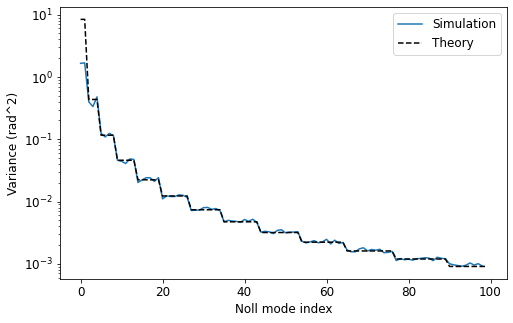

In [16]:
pyplot.plot(Zcoeffs.var(1)[1:], label='Simulation')
pyplot.plot(noll * (sim_noao.D_ground/sim_noao.r0_los)**(5/3), color='k', linestyle='--', label='Theory')
pyplot.semilogy()
pyplot.legend(loc=0)
pyplot.xlabel("Noll mode index")
pyplot.ylabel("Variance (rad^2)")

The addition of subharmonics can produce better fit to the theory for low order (tip/tilt) modes.

In [17]:
p_noao_subharm = p_noao.copy()
p_noao_subharm['SUBHARM'] = True
sim_noao_subharm = fast.Fast(p_noao_subharm)
sim_noao_subharm.run()

fast.fast.init_atmos [INFO]  Initialising atmosphere
fast.fast.init_beam_params [INFO]  Initialising beam parameters
fast.fast.init_frequency_grid [INFO]  Initialising spatial frequencies
fast.fast.init_frequency_grid [INFO]  Auto set NPXLS to 164
fast.fast.init_ao_params [INFO]  Initialising AO parameters
fast.fast.init_pupil_mask [INFO]  Initialising pupil mask
fast.fast.init_phs_logamp [INFO]  Initialising phase and log-amplitude arrays
fast.fast.compute_link_budget [INFO]  Computing analytical link budget
fast.fast.compute_powerspec [INFO]  Computing (residual) phase power spectra
fast.fast.compute_powerspec [INFO]  Computing (residual) phase power spectra
fast.fast.compute_powerspec [INFO]  Computing subharmonics power spectra
100%|██████████| 1/1 [00:02<00:00,  2.97s/it]


In [18]:
Zcoeffs_subharm = numpy.array([(sim_noao_subharm.phs[:,1:-1,1:-1] * i).sum((1,2)) for i in Z]) / Z[0].sum()

Text(0, 0.5, 'Variance (rad^2)')

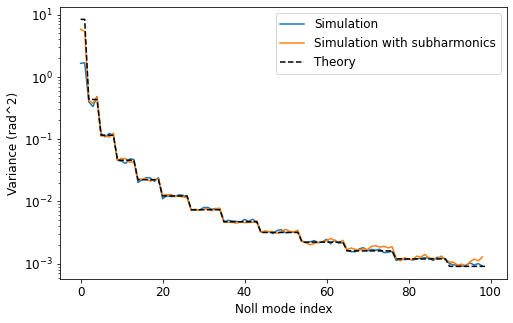

In [19]:
pyplot.plot(Zcoeffs.var(1)[1:], label='Simulation')
pyplot.plot(Zcoeffs_subharm.var(1)[1:], label='Simulation with subharmonics')
pyplot.plot(noll * (sim_noao.D_ground/sim_noao.r0_los)**(5/3), color='k', linestyle='--', label='Theory')
pyplot.semilogy()
pyplot.legend(loc=0)
pyplot.xlabel("Noll mode index")
pyplot.ylabel("Variance (rad^2)")

## Comparison of scintillation index and Rx power distributions to theory

For uncorrected turbulence, [theory exists](https://spie.org/publications/book/626196?SSO=1) describing the expected variance of the Rx power (scintillation index) and its distribution (lognormal, gamma-gamma models etc.). We can compare the output of the simulation in these cases. 